In [1]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype


In [2]:
# SUBGRAPH_API_URL = "http://192.168.1.64:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-no-optimized-his"
SUBGRAPH_API_URL = "http://localhost:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-no-op-his-v3"

sg = Subgrounds()

zero_ex = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())

TIMESTAMP_NAME = "timestamp"
ALL_ENTRIES = 100000000

2024-01-10


In [3]:
def plot_time_series_df(df, title): 
    for k in df.keys():
        if(k != TIMESTAMP_NAME) and is_numeric_dtype(df[k]):
            df.plot(x=TIMESTAMP_NAME, y=k, legend=False)
            plt.title(title + ": " + k.split("_")[-1])

    plt.show()  

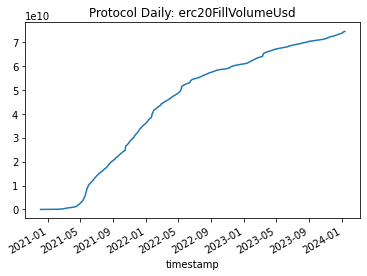

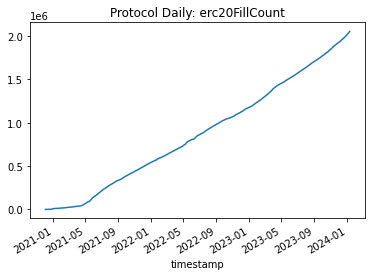

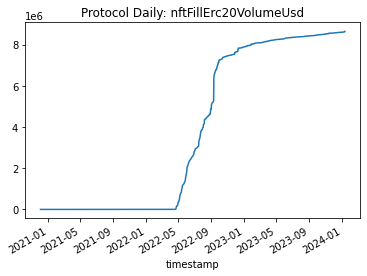

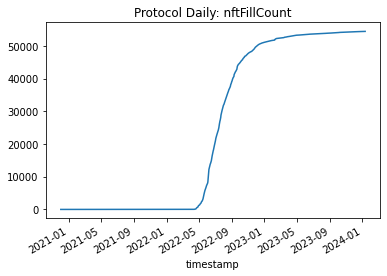

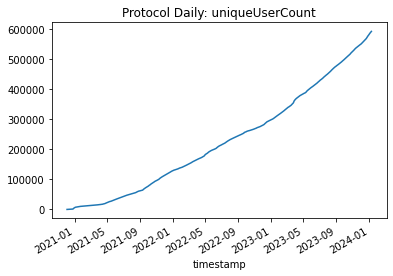

In [4]:
# Protocol Historical
protocol_daily = zero_ex.Query.protocol(id="0x00").dailyDataSnapshots(orderBy=zero_ex.DailyProtocolData.timestamp, orderDirection="desc", first=ALL_ENTRIES)

df = sg.query_df([protocol_daily.timestamp, protocol_daily.data])
df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
df

plot_time_series_df(df, "Protocol Daily")

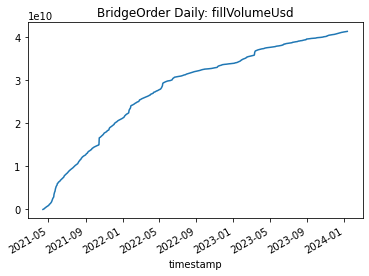

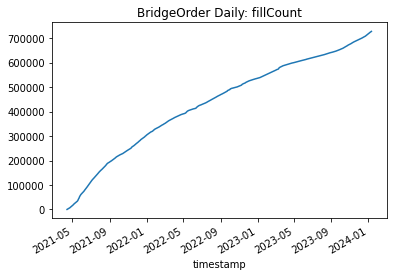

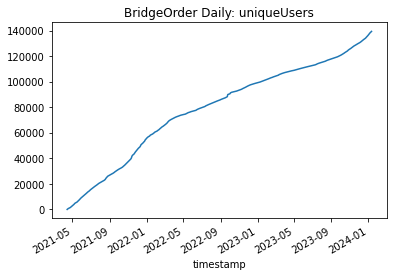

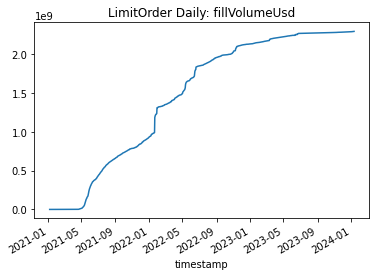

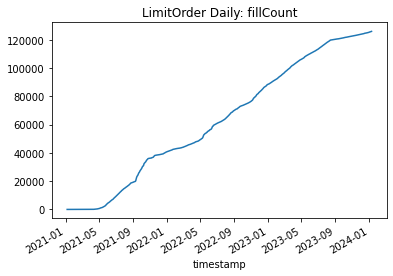

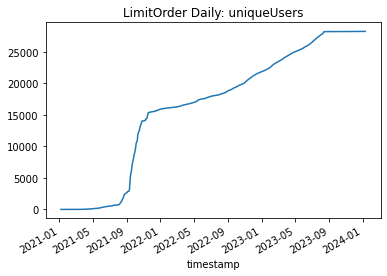

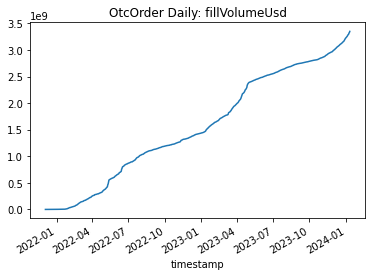

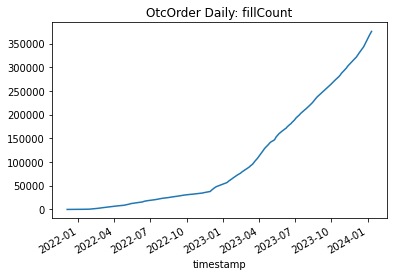

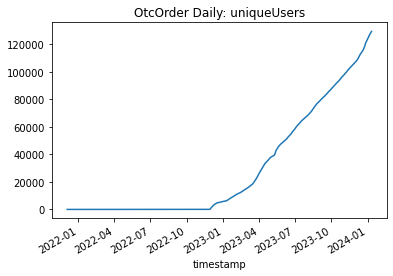

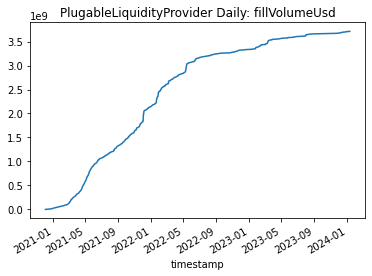

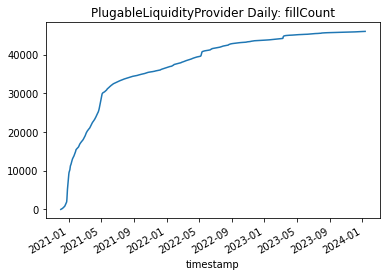

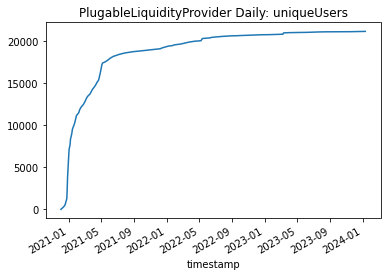

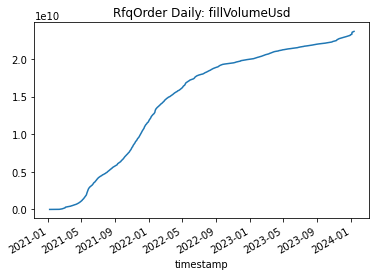

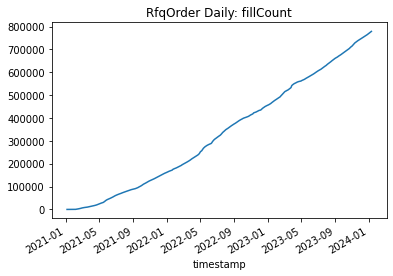

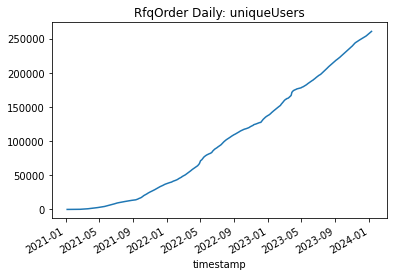

In [17]:
# Fill Type Summary Historical
fill_type_summaries = zero_ex.Query.erc20FillTypeSummaries

df = sg.query_df([fill_type_summaries.id, fill_type_summaries.type], columns=["id", "type"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20FillTypeSummary(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20FillTypeSummaryData.timestamp, orderDirection="asc")
    daily_snapshots_df = sg.query_df([snapshots.timestamp, snapshots.data])
    daily_snapshots_df.rename(columns={ daily_snapshots_df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    daily_snapshots_df[TIMESTAMP_NAME] = pd.to_datetime(daily_snapshots_df[TIMESTAMP_NAME], unit="s")
    # display(daily_snapshots_df)
    plot_time_series_df(daily_snapshots_df, f"{row.type} Daily")


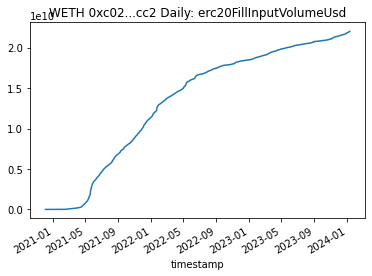

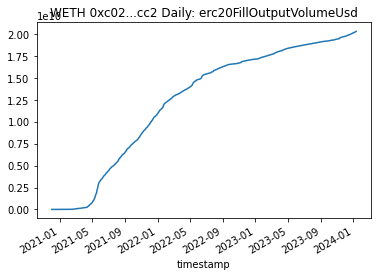

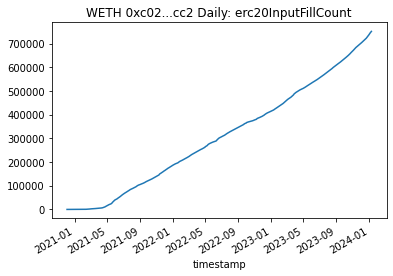

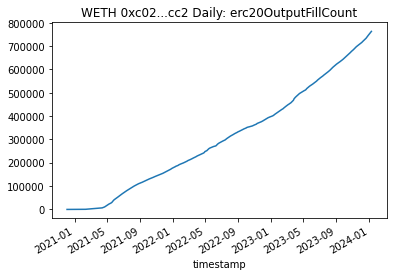

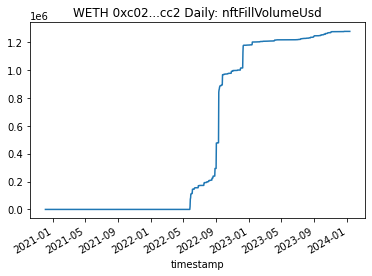

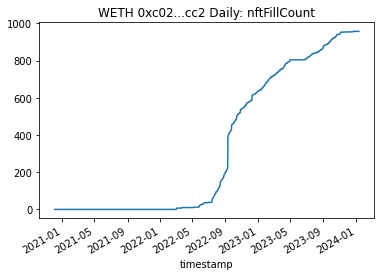

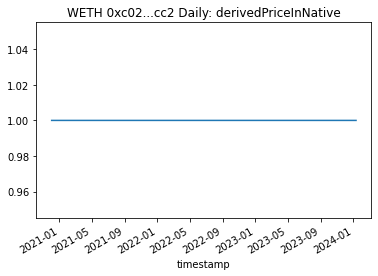

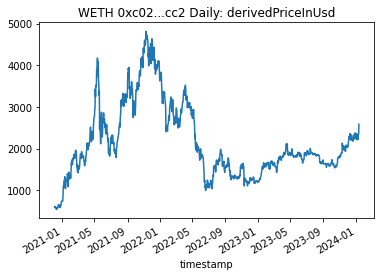

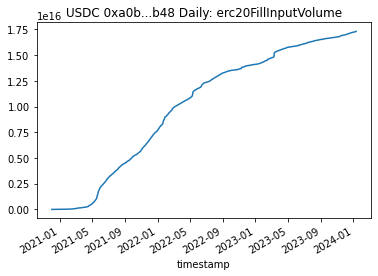

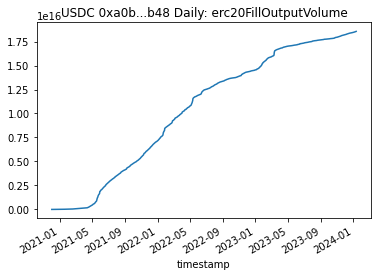

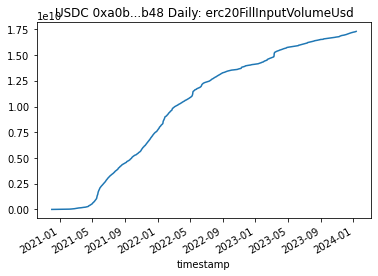

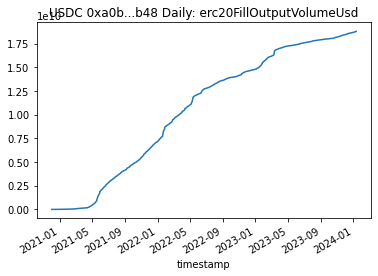

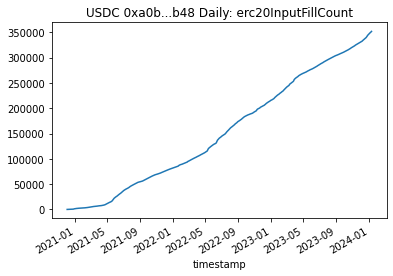

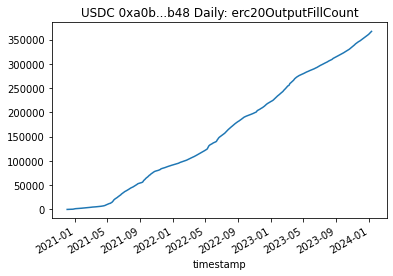

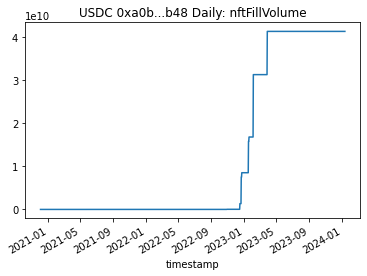

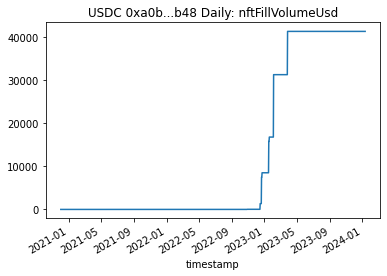

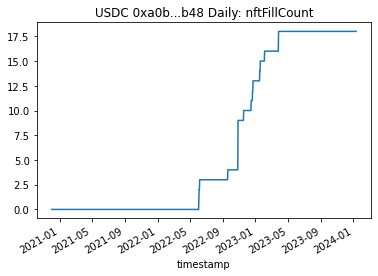

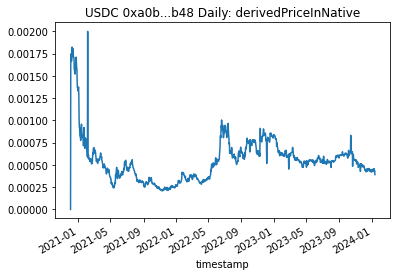

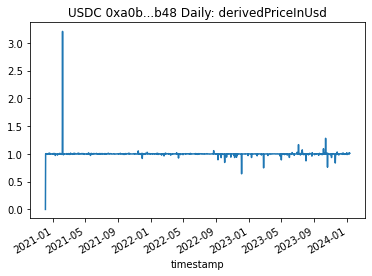

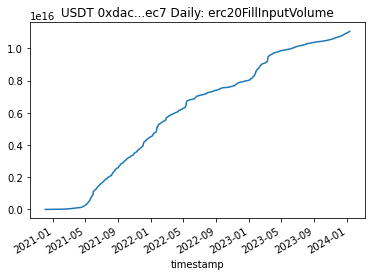

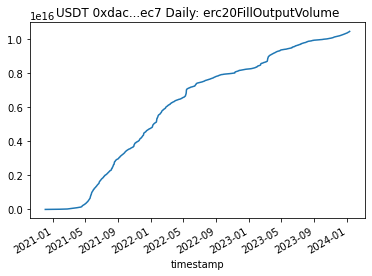

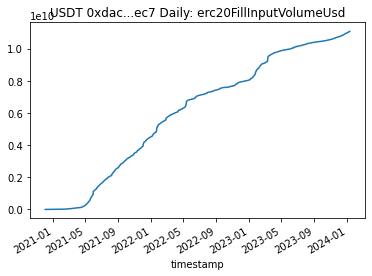

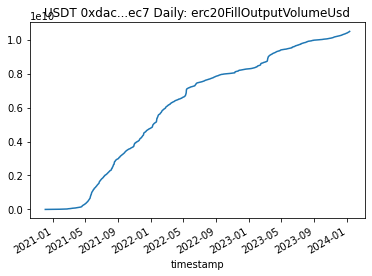

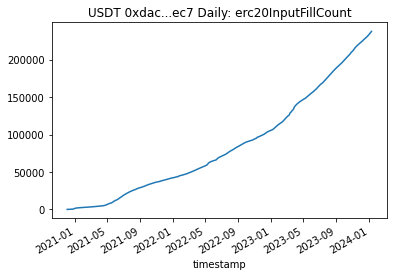

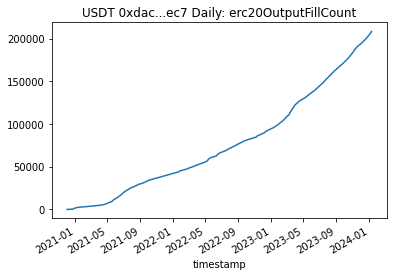

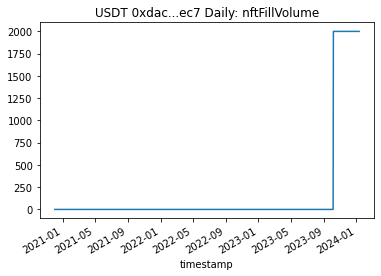

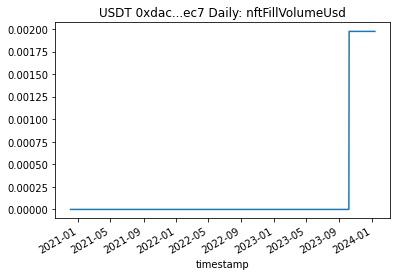

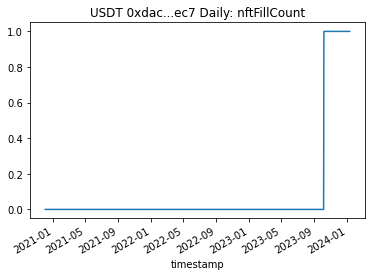

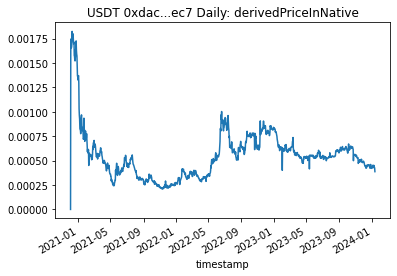

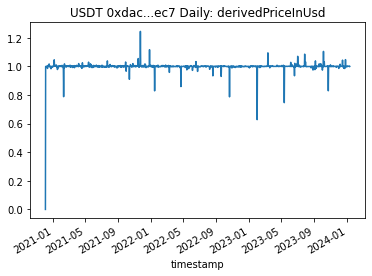

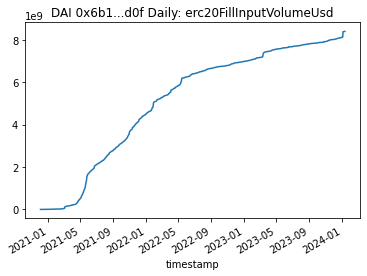

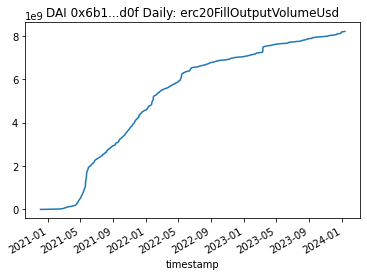

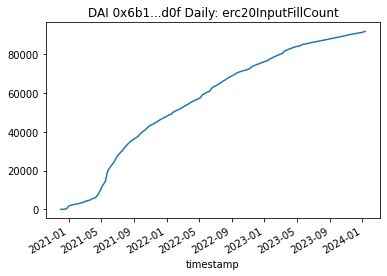

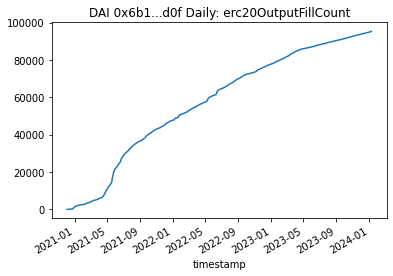

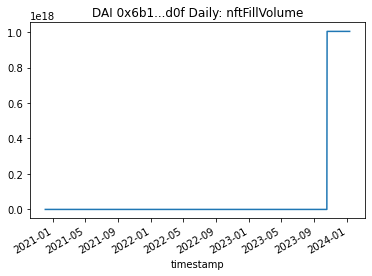

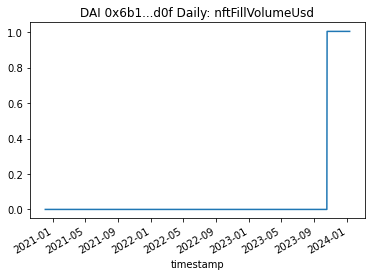

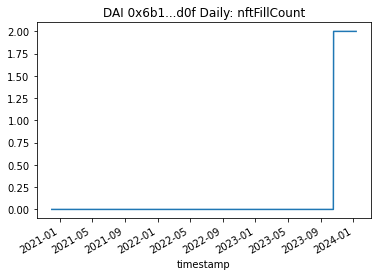

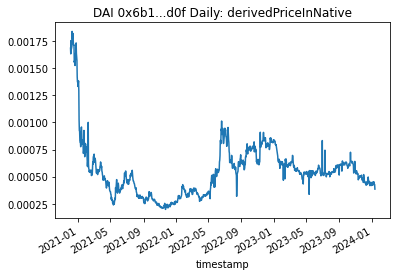

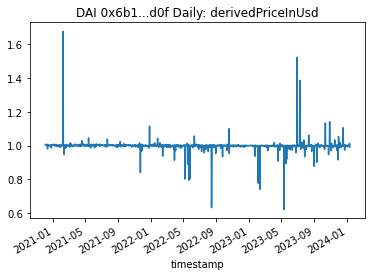

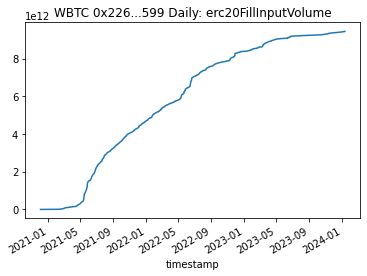

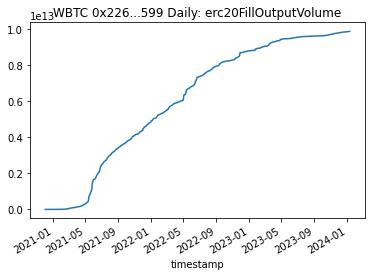

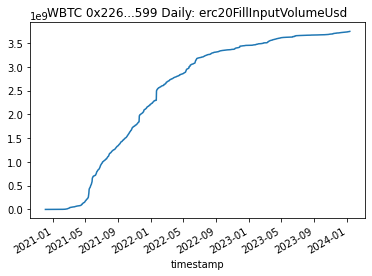

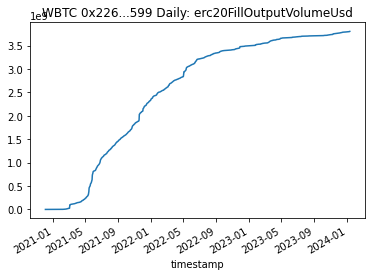

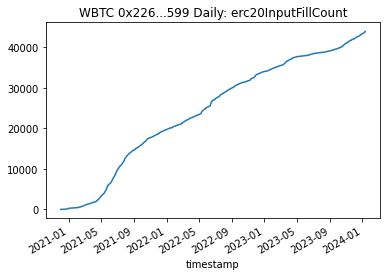

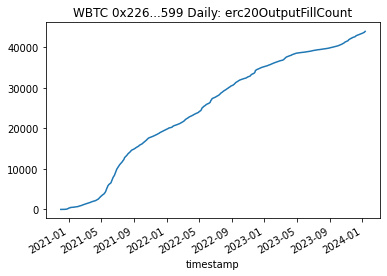

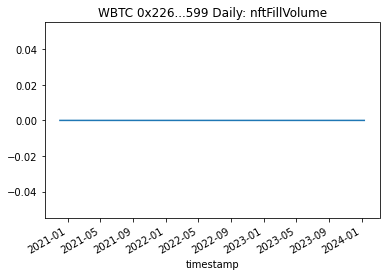

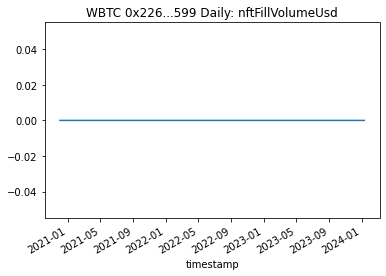

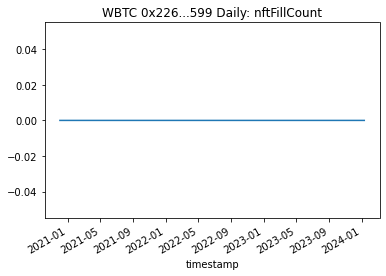

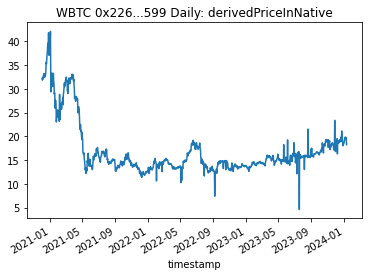

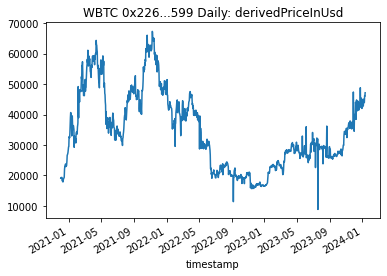

In [39]:
# ERC20 Token Historical
erc20Token = zero_ex.Query.erc20Tokens(first=5, orderBy=zero_ex.Erc20Token.data.erc20InputFillCount, orderDirection="desc")

df = sg.query_df([erc20Token.id, erc20Token.symbol, erc20Token.address], columns=["id", "symbol", "address"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20Token(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20TokenData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    plot_time_series_df(df, f"{row.symbol} {row.address[0:5]}...{row.address[-3:]} Daily")

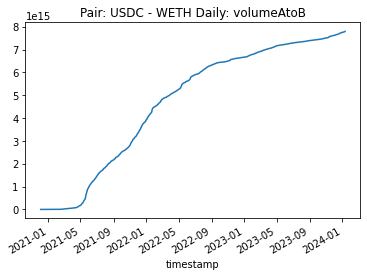

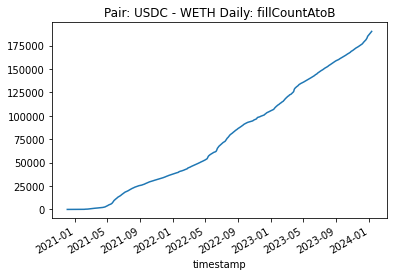

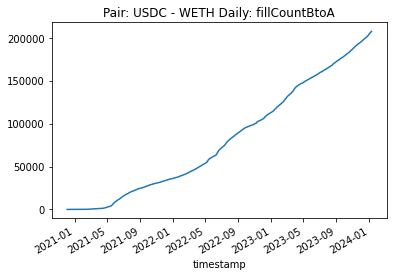

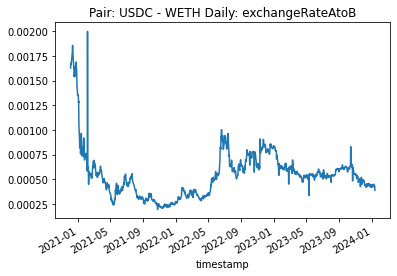

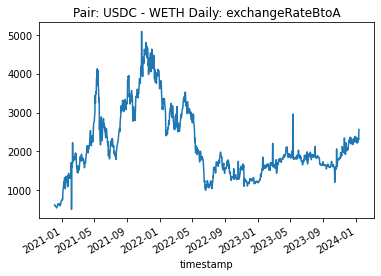

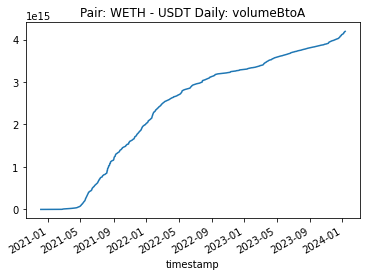

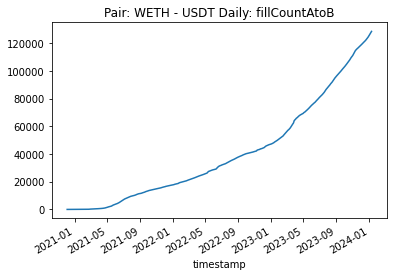

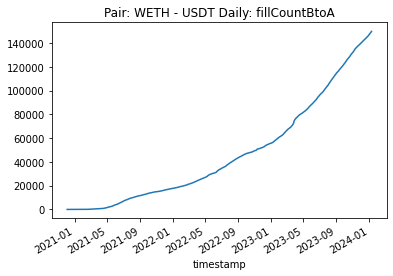

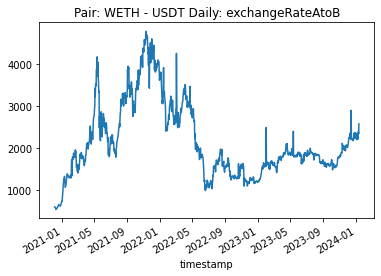

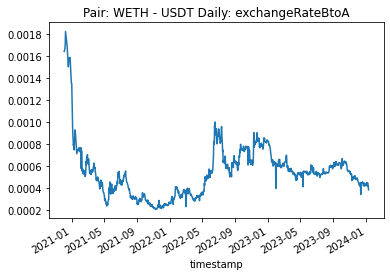

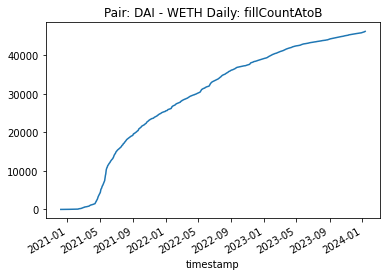

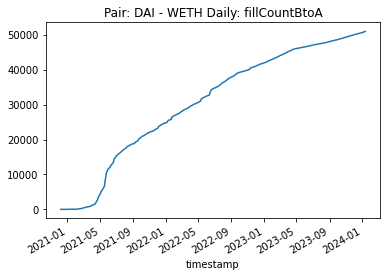

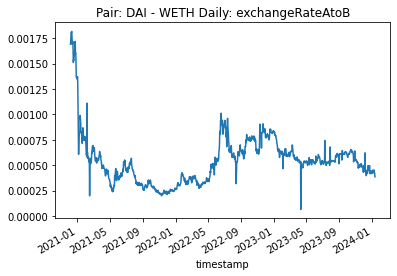

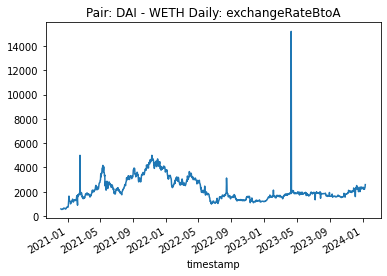

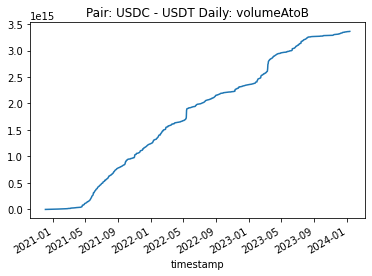

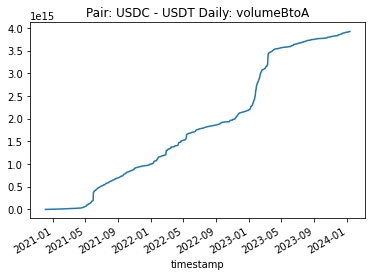

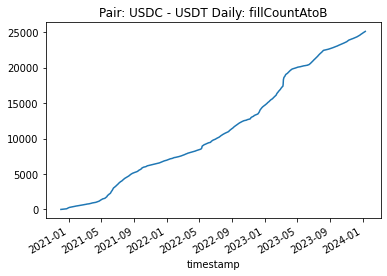

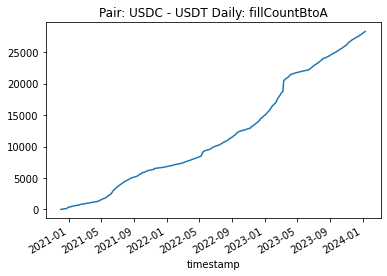

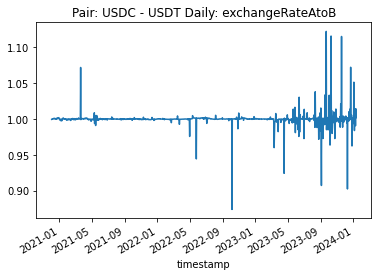

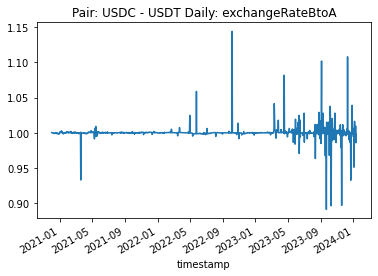

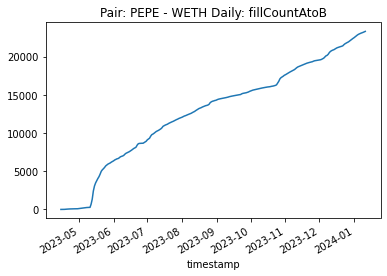

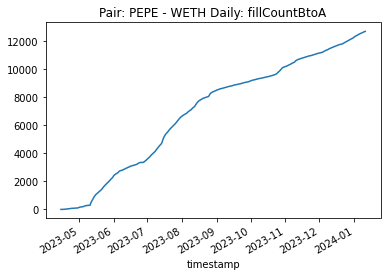

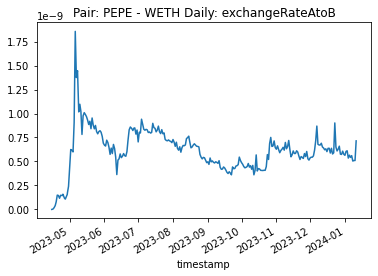

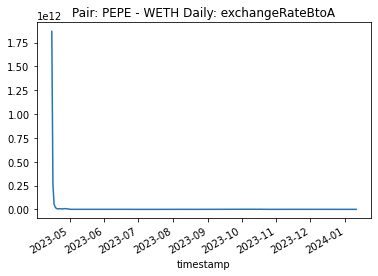

In [40]:
# ERC20 Token Pair Historical
pairs = zero_ex.Query.erc20TokenPairs(first=5, orderBy=zero_ex.Erc20TokenPair.data.fillCountAtoB, orderDirection="desc")

df = sg.query_df([pairs.id, pairs.tokenA.symbol, pairs.tokenB.symbol], columns=["id", "tokenA", "tokenB"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20TokenPair(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20TokenPairData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    plot_time_series_df(df, f"Pair: {row.tokenA} - {row.tokenB} Daily")

0xd07dc4262bcdbf85190c01c996b4c06a461d2430


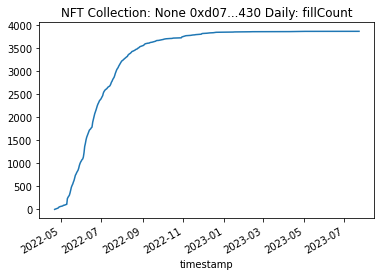

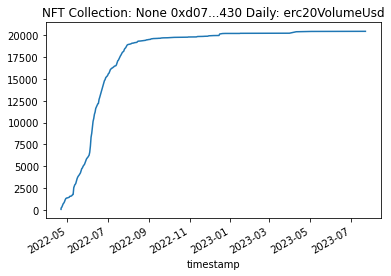

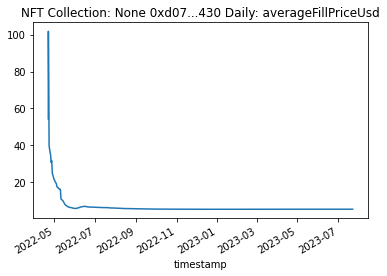

0x495f947276749ce646f68ac8c248420045cb7b5e


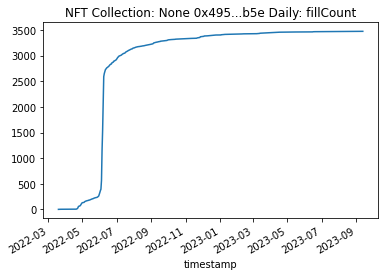

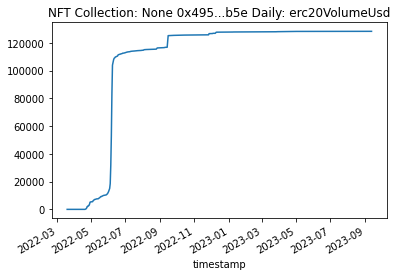

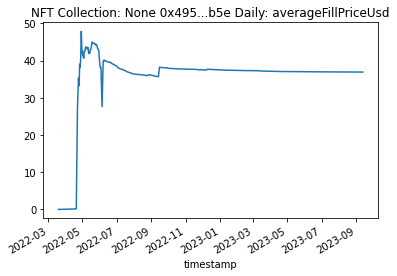

0xb66a603f4cfe17e3d27b87a8bfcad319856518b8


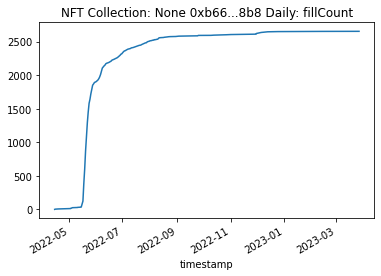

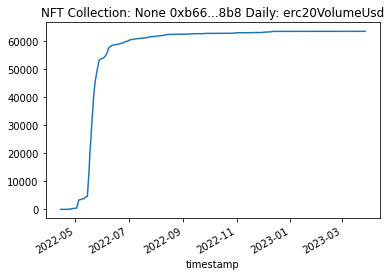

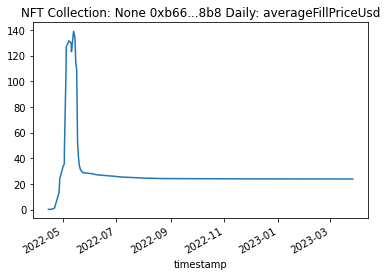

0xa909871f46d2cd8fb015d176483ffc3c330dcda4


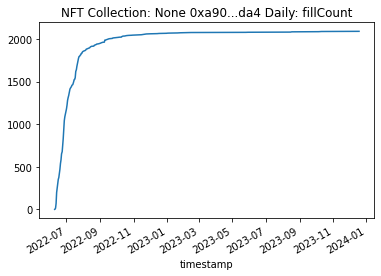

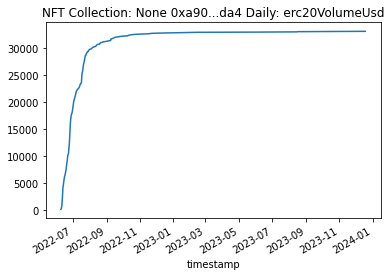

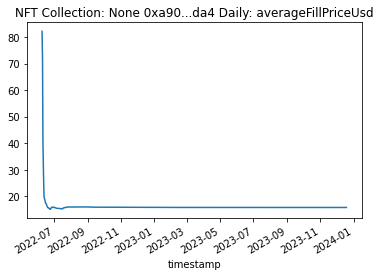

0x3fc09fa16986483edcbad8d6cf5c87e84ad5a4ce


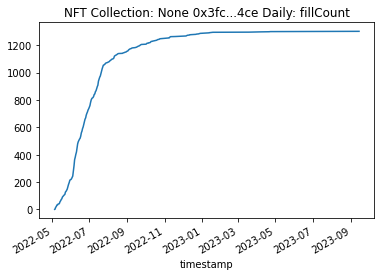

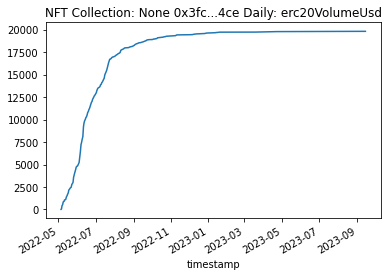

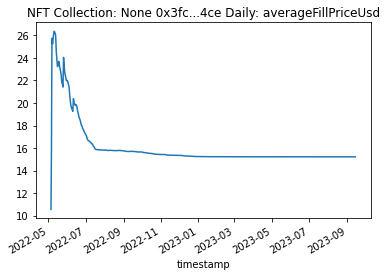

In [44]:
# Nft Collection Historical
collections = zero_ex.Query.nftCollections(first=5, orderBy=zero_ex.NftCollection.data.fillCount, orderDirection="desc")

df = sg.query_df([collections.id, collections.address, collections.name], columns=["id", "address", "name"])
 
for row in df.itertuples():
    snapshots = zero_ex.Query.nftCollection(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyNftCollectionData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    print(row.address)
    plot_time_series_df(df, f"NFT Collection: {row.name} {row.address[0:5]}...{row.address[-3:]} Daily")